Analysis of victims and survivors of passengers in the Titanic

Question we need to anwer:
1. How many survived passengers? and what gender they were?
2. What the average age for each gender?
4. What information can u give about Age ?
5. Occurance of age in each pclass.


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv('tested.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
#describing how many columns and rows have table
titanic.shape


(418, 12)

In [4]:
# columns of the table
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# sums of nulls in each column
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
# counting how many male and female
titanic.Sex.value_counts()



male      266
female    152
Name: Sex, dtype: int64

In [7]:
# number(sum) of survived people 
survived_p = (titanic['Survived']==1).sum() 
print('There were ', survived_p, ' survived passengers from the titanic')


There were  152  survived passengers from the titanic


In [8]:
# average age for each male female
titanic[['Sex', 'Age']].groupby('Sex', as_index = False).mean()

,Sex,Age
0,female,30.272362
1,male,30.272732


In [9]:
# mean of pclass for each survived and non survived people survived value in ascending order
titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.467290
2,3,0.330275
1,2,0.322581


In [10]:
# counting survived people from each sex
titanic.groupby(['Sex', 'Survived'])['Sex'].count().unstack()


Survived,0,1
Sex,,
female,NaN,152.0
male,266.0,NaN


<AxesSubplot: xlabel='Survived', ylabel='count'>

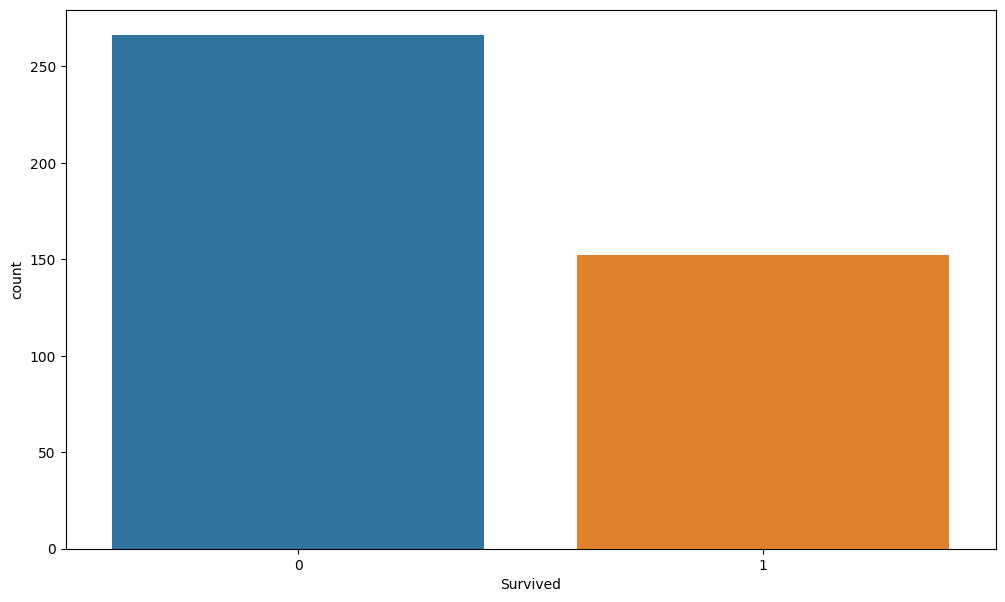

In [11]:
# showing sum of each survived  status 
plt.figure(figsize=(12, 7))
sns.countplot(x='Survived',data=titanic)

<AxesSubplot: xlabel='Survived', ylabel='count'>

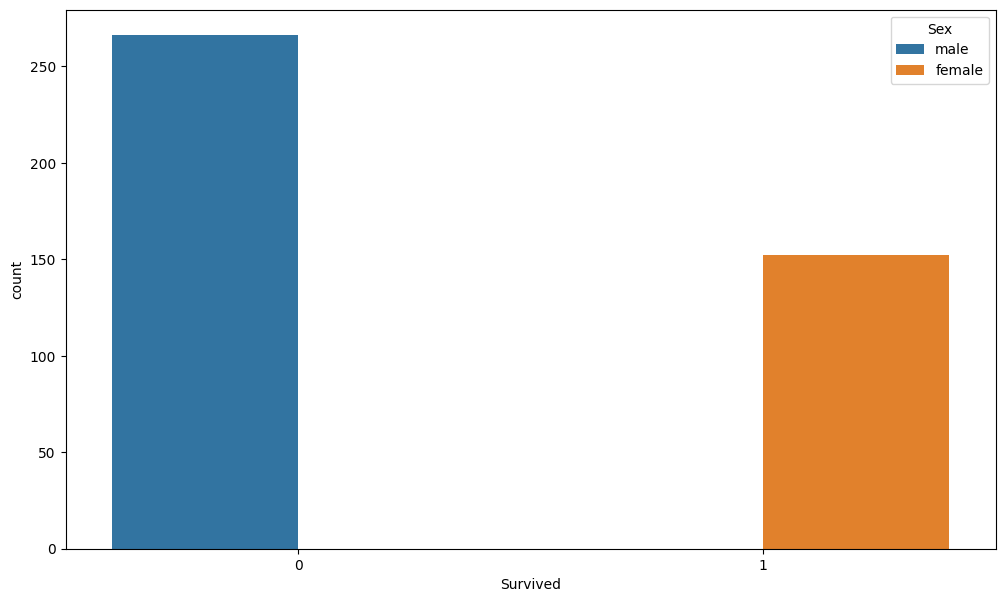

In [12]:
# showing sum of each survived status in hex with sex
plt.figure(figsize=(12, 7))

sns.countplot(x='Survived',hue='Sex',data=titanic)

<AxesSubplot: xlabel='Survived', ylabel='count'>

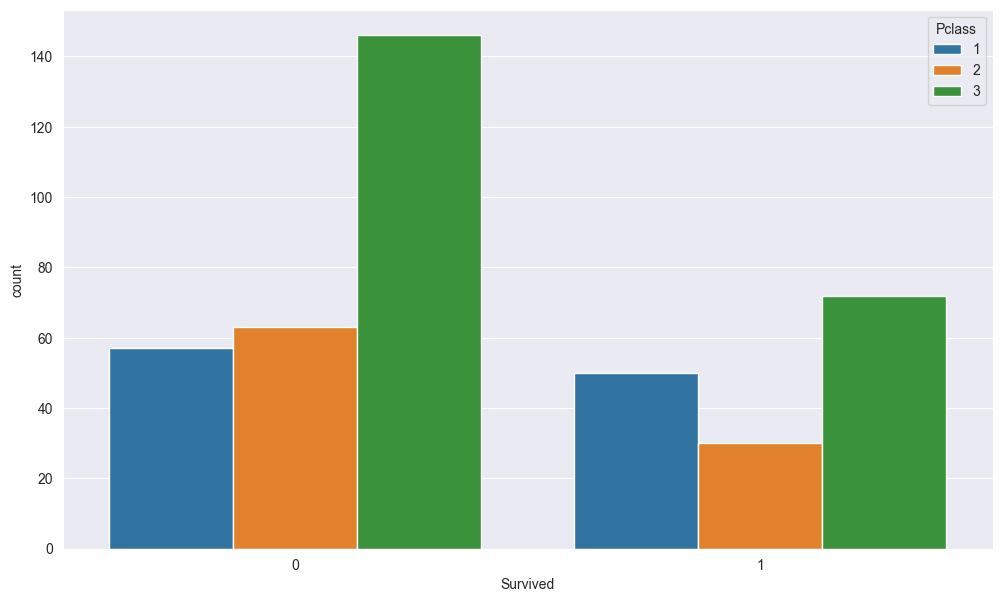

In [13]:
# counting survived people by each pclass(hue)
plt.figure(figsize=(12, 7))
sns.countplot(x='Survived',hue='Pclass',data=titanic)

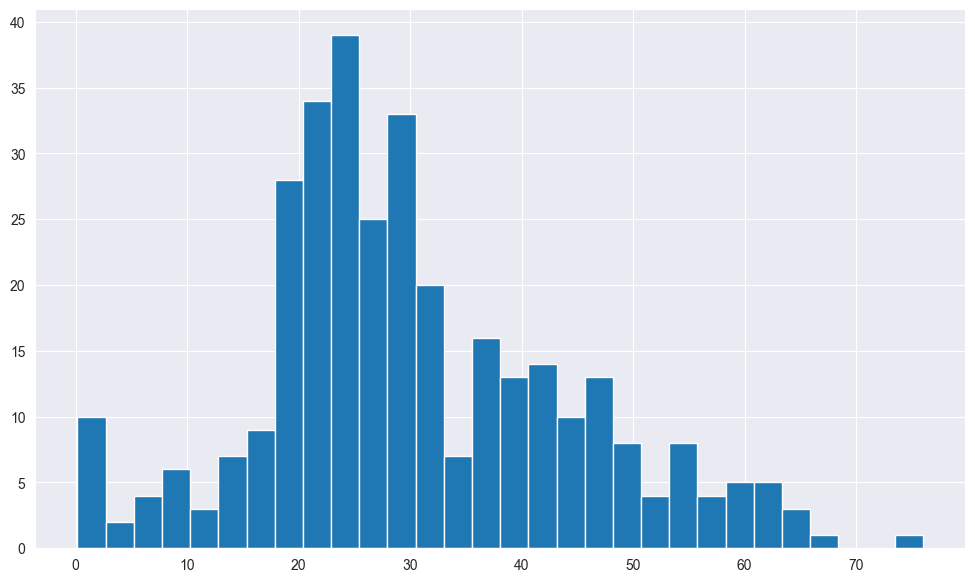

In [14]:
# showing ages as histogram 
plt.figure(figsize=(12, 7))
plt.hist(titanic['Age'].dropna(),bins=30)
plt.show()

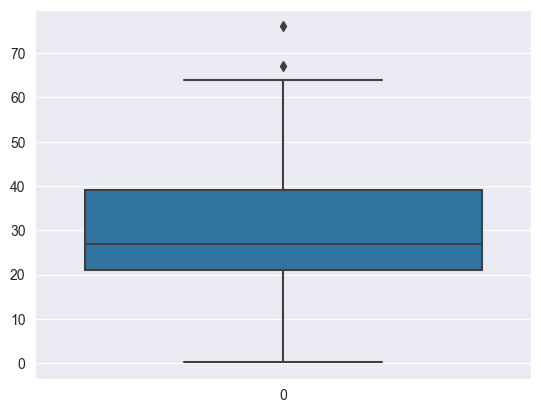

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64
41


In [15]:
# showing age as boxplot, and describe of column
plt.figure()
sns.boxplot(titanic['Age'])
plt.show()
print(titanic['Age'].describe())
print((titanic['Age'] <18).sum())

In [16]:
#Categorize based on age group
# 0-17 - Children
# 18-39 - Youth
# 40-59 - MiddleAged
# 60+ - SeniorCitizens
# adding age group column that will show age groups
bins = [-np.inf,17, 39, 59, np.inf]
labels = ["Children","Youth","MiddleAged","SeniorCitizens"]
titanic['AgeGrp'] = pd.cut(titanic['Age'], bins=bins, labels=labels)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGrp
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Youth
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,MiddleAged
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,SeniorCitizens
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Youth
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Youth
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Youth
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Youth
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,NaN


In [17]:
# showing value count of each group
titanic['AgeGrp'].value_counts().values


array([209,  68,  41,  14], dtype=int64)

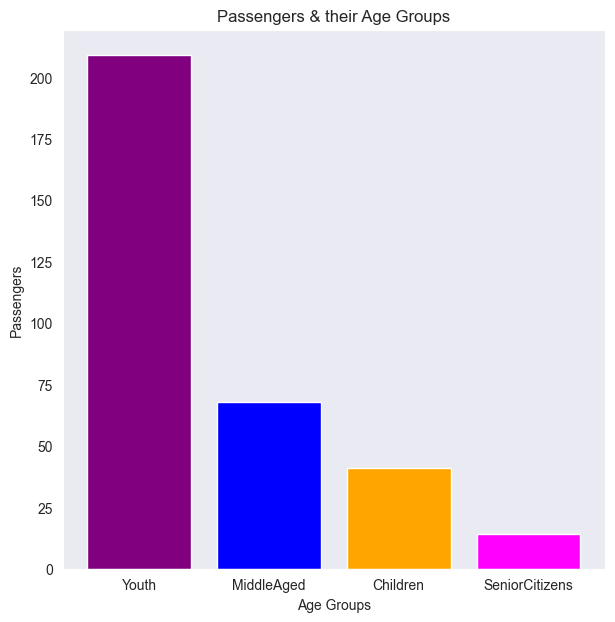

In [18]:
# passengers and their age group
plt.figure(figsize=(7,7))
plt.xlabel('Age Groups')
plt.ylabel('Passengers')
plt.yticks()
plt.grid()
plt.title('Passengers & their Age Groups')
plt.bar(titanic['AgeGrp'].value_counts().keys(),titanic['AgeGrp'].value_counts(),color=['purple','blue','orange','magenta'])
plt.show()

In [19]:
# survived passengers and their age group
survived = titanic[titanic['Survived']==1]
bins = [-np.inf,17, 39, 59, np.inf]
labels = ["Children","Youth","MiddleAged","SeniorCitizens"]
survived['AgeGrp'] = pd.cut(survived['Age'], bins=bins, labels=labels)

C:\Users\77006\AppData\Local\Temp\ipykernel_6704\1920785670.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survived['AgeGrp'] = pd.cut(survived['Age'], bins=bins, labels=labels)


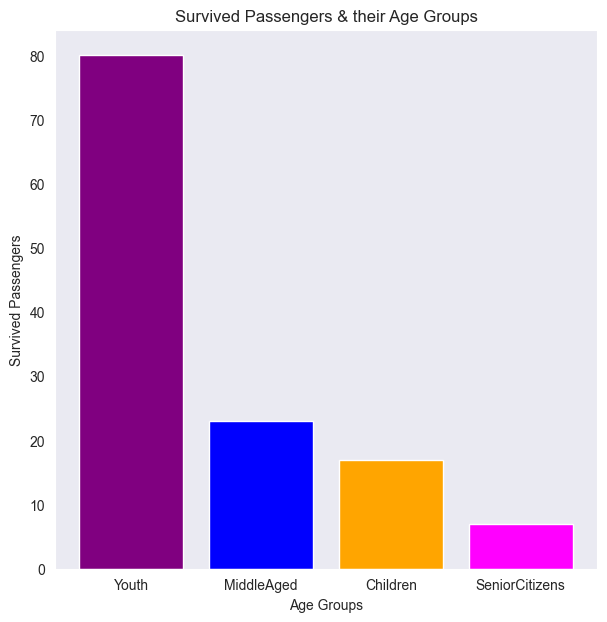

In [20]:
plt.figure(figsize=(7,7))
plt.xlabel('Age Groups')
plt.ylabel('Survived Passengers')
plt.yticks()
plt.grid()
plt.title('Survived Passengers & their Age Groups')
plt.bar(survived['AgeGrp'].value_counts().keys(),survived['AgeGrp'].value_counts(),color=['purple','blue','orange','magenta'])
plt.show()

C:\Users\77006\AppData\Local\Temp\ipykernel_6704\3955604827.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dead['AgeGrp'] = pd.cut(dead['Age'], bins=bins, labels=labels)


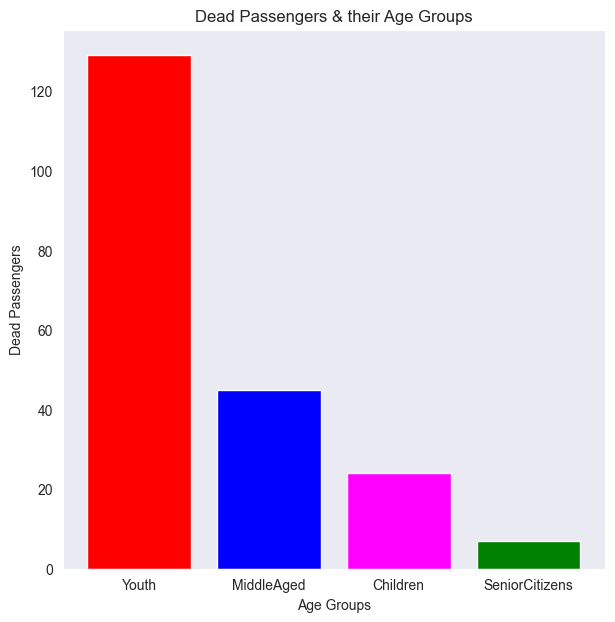

In [21]:
dead = titanic[titanic['Survived']==0]

#Categorize based on age group for dead
bins = [-np.inf,17, 39, 59, np.inf]
labels = ["Children","Youth","MiddleAged","SeniorCitizens"]
dead['AgeGrp'] = pd.cut(dead['Age'], bins=bins, labels=labels)

plt.figure(figsize=(7,7))
plt.xlabel('Age Groups')
plt.ylabel('Dead Passengers')
plt.yticks()
plt.grid()
plt.title('Dead Passengers & their Age Groups')
plt.bar(dead['AgeGrp'].value_counts().keys(),dead['AgeGrp'].value_counts(),color=['red','blue','magenta','green'])
plt.show()

In [22]:
# counting people in each pclass
titanic['Pclass'].value_counts()


3    218
1    107
2     93
Name: Pclass, dtype: int64

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

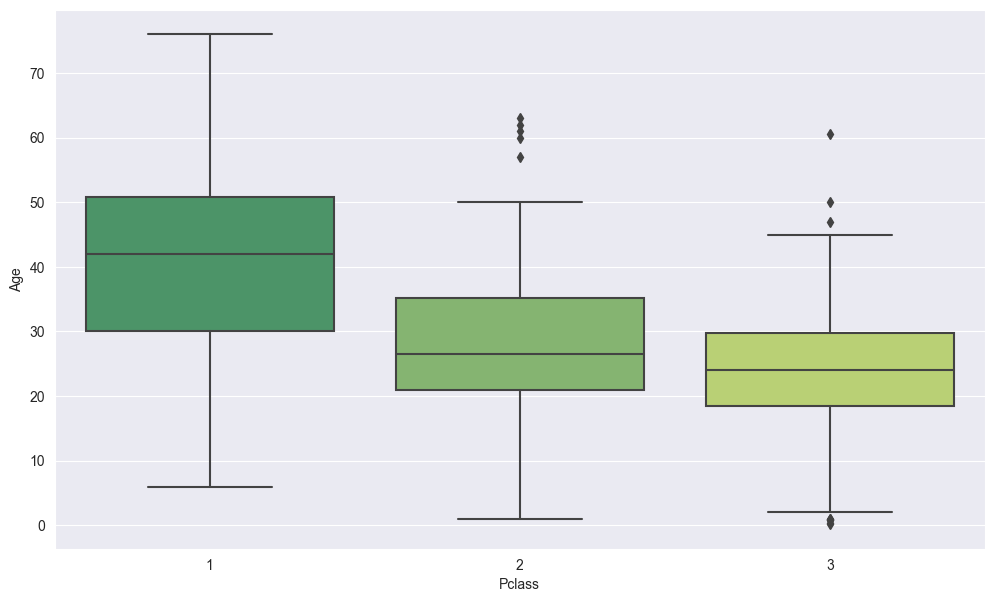

In [23]:
# boxplot of age and pclass
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='summer')
# We can see the wealthier passengers in the higher classes tend to be older, which makes sense. 




In [24]:
# by analyse before, we can see that the wealthier people are older than other classes. filling nan values by this analyse if pclass 1 =37, and 29, 24
def fillna_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [25]:
# by age and pclass applying age by def fillna_age
titanic['Age'] = titanic[['Age','Pclass']].apply(fillna_age,axis=1)
titanic.Age.isnull().sum()


0

In [26]:
# how many males and females had cabins
cabin_male = ((titanic['Cabin'].notnull()) & (titanic['Sex']=='male')).sum()
cabin_female = ((titanic['Cabin'].notnull()) & (titanic['Sex']=='female')).sum()
print(cabin_male, ' males had cabins and ', cabin_female, ' females had cabin')

47  males had cabins and  44  females had cabin


In [27]:
titanic['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

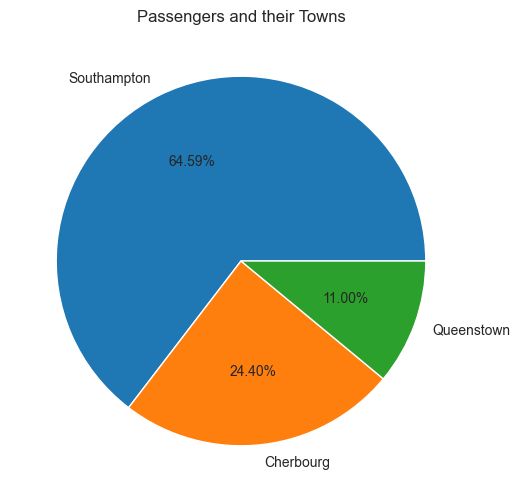

In [28]:
# towns and pasengers
plt.figure(figsize=(6,6))
plt.title('Passengers and their Towns')
#shadow=True
plt.pie(titanic['Embarked'].value_counts(),labels=['Southampton','Cherbourg','Queenstown'], autopct ='%1.02f%%')
plt.show()

Answers:
1. There are 152 survived passengers. By this dataset All of them were female. And all males were died.
2. In each gender type there are approximately same average. but average of male is greater for 0.013 than female
4. There is a histogram and boxplot. Which give info about occurance of each age and median max, min etc.
5. By the analyse above, in the 1st class most of people are older than other classes. And by this analyse I figured out how I can fill all nan values in Age column.  